# Интернет-магазин.  Гипотезы и A/B-тест.


Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [9]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option('display.max_colwidth',-1) 

In [10]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.to_csv('hypothesis.csv',index=False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [8]:
hypothesis['Hypothesis'].values

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В исходном датафрейме 9 строк и 5 столбцов: hypothesis — краткое описание гипотезы; Reach — охват пользователей по 10-балльной шкале; Impact — влияние на пользователей по 10-балльной шкале; Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
Типы данных корректны, пропусков нет. Параметры фреймворков ICE и RICE оценены по 10-балльной шкале.

## Приоритизация гипотез - фреймворк ICE.

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач. 

Посчитаем ICE для гипотез по формуле ICE = Impact * Confidence / Efforts. Добавим полученные значения ICE к существующей таблице.

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
print(hypothesis[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False))

                                          Hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


Наиболее перспективные гипотезы по  ICE: 8,0,7,6.

## Приоритизация гипотез - фреймворк RICE. 

У метода ICE есть модификация RICE (R от англ. reach, «охват»). Посчитаем RICE для гипотез по формуле RICE = Reach * Impact * Confidence / Efforts. Добавим полученные значения RICE к существующей таблице.

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
print(hypothesis[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Наиболее перспективные гипотезы по RICE: 7,2,0,6.

### Выводы

Смотрим на место гипотез среди остальных, а не на абсолютную оценку.
Наиболее перспективные гипотезы по  ICE: 8,0,7,6.
Наиболее перспективные гипотезы по RICE: 7,2,0,6.
На первом месте оказалась гипотеза 7, так как у нее самое высокое знаение параметра Reach, в то время как у других он меньше. Гипотеза 8 оказалась на 4-м месте, так как знаение параметра Reach,равное 1, намного меньше, чем у гипотез 7,0,6.
При применение RICE кроме силы гипотез учитывается и то, как много пользователей она затронет.

# Часть 2. Анализ A/B-теста

Проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице  orders 1197 записей и 5 столбцов: transactionId — идентификатор заказа; visitorId — идентификатор пользователя, совершившего заказ; date — дата, когда был совершён заказ; revenue — выручка заказа; group — группа A/B-теста, в которую попал заказ. Пропусков нет.

In [8]:
# Замена типа данных столбца data
orders['date'] = orders['date'].astype('datetime64')

In [9]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

В таблице представлены данные за один месяц - август 2019 года.

In [10]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Количество записей, относящихся к гипотезе В на 83 меньше, чем записей, относящихся к гипотезе А.

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице visitors 62 строки и 3 столбца: date — дата; group — группа A/B-теста; visitors — количество пользователей в указанную дату в указанной группе A/B-теста. Пропусков нет.

In [13]:
# Замена типа данных столбца data
visitors['date'] = visitors['date'].astype('datetime64')

In [14]:
visitors['date'].value_counts()

2019-08-02    2
2019-08-05    2
2019-08-21    2
2019-08-15    2
2019-08-09    2
2019-08-03    2
2019-08-28    2
2019-08-22    2
2019-08-16    2
2019-08-10    2
2019-08-04    2
2019-08-29    2
2019-08-23    2
2019-08-17    2
2019-08-11    2
2019-08-30    2
2019-08-08    2
2019-08-24    2
2019-08-18    2
2019-08-12    2
2019-08-06    2
2019-08-31    2
2019-08-25    2
2019-08-19    2
2019-08-13    2
2019-08-07    2
2019-08-01    2
2019-08-26    2
2019-08-20    2
2019-08-14    2
2019-08-27    2
Name: date, dtype: int64

In [15]:
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

В таблице представлены данные за один месяц - август 2019 года. 

In [16]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

За каждый день имеется две записи - результат группы А и результат группы В.

Размер выборки А равен размеру выборки В. Отлично, можно приступить к анализу.

## График кумулятивной выручки по группам. 

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 1150
Data columns (total 2 columns):
date     62 non-null datetime64[ns]
group    62 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ KB


In [18]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group']==x['group'])]
                                     .agg({'date':'max','group':'max','transactionId':pd.Series.nunique,
                                           'visitorId':pd.Series.nunique,'revenue':'sum'}),
                                     axis= 1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Построим графики кумулятивной выручки по дням и группам A/B-тестирования

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeA = ordersAggregated[ordersAggregated['group']=='A'][['date','revenue','transactionId']]
cummulativeA.head()

,date,revenue,transactionId
55,2019-08-01,148579,24
175,2019-08-02,242401,44
291,2019-08-03,354874,68
499,2019-08-04,425699,84
698,2019-08-05,549917,109


In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeB = ordersAggregated[ordersAggregated['group']=='B'][['date','revenue','transactionId']]
cummulativeB.head()

,date,revenue,transactionId
66,2019-08-01,101217,21
173,2019-08-02,266748,45
310,2019-08-03,380996,61
498,2019-08-04,489567,78
699,2019-08-05,581995,101


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


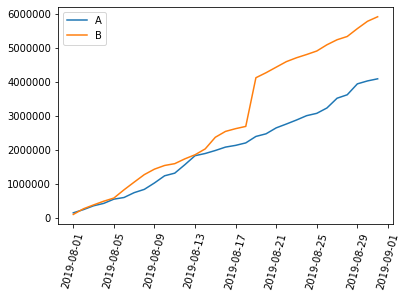

In [21]:
plt.plot(cummulativeA['date'], cummulativeA['revenue'], label='A') # строим график выручки группы А 
plt.plot(cummulativeB['date'], cummulativeB['revenue'], label='B') # строим график выручки группы B
plt.xticks(rotation = 75) 
plt.legend()
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. 
Однако графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

## График кумулятивного среднего чека по группам. 

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

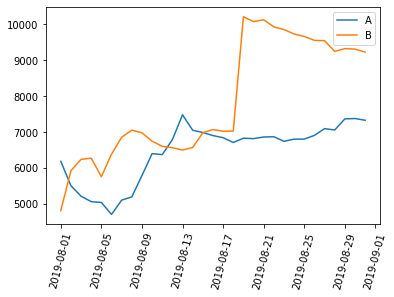

In [22]:
# строим график среднего чека группы А 
plt.plot(cummulativeA['date'], cummulativeA['revenue']/cummulativeA['transactionId'], label='A') 
# строим график среднего чека группы В
plt.plot(cummulativeB['date'], cummulativeB['revenue']/cummulativeB['transactionId'], label='B') 
plt.xticks(rotation = 75) 
plt.legend()
plt.show()

Средний чек становится ,более равномерным ближе к концу теста: слегка растет для группы A и немного снижается для группы B. На графике заметны резкие всплески, возможно в данные попали крупные заказы, т.е. возможно наличие выбросов.

## График относительного изменения кумулятивного среднего чека группы B к группе A.

Построим график относительного различия для среднего чека.

In [23]:
# объединим датафреймы
cummulativeAB = cummulativeA.merge(cummulativeB,on='date',suffixes=['A','B'])
cummulativeAB.head()

,date,revenueA,transactionIdA,revenueB,transactionIdB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


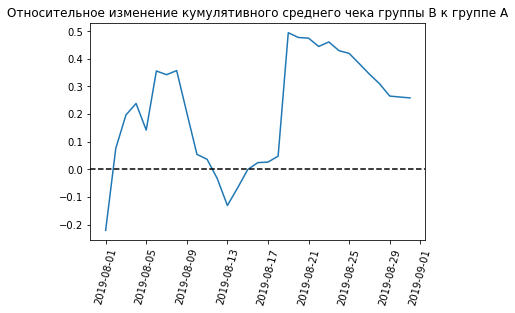

In [24]:
# cтроим отношение средних чеков
plt.plot(cummulativeAB['date'],(cummulativeAB['revenueB']/cummulativeAB['transactionIdB'])
                                /(cummulativeAB['revenueA']/cummulativeAB['transactionIdA'])-1)
plt.xticks(rotation = 75) 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

В нескольких точках график различия между группами резко cкачет, значит, в данных присутствуют выбросы. По данным графика похоже, что кумулятивный средний чек группы B выше, чем в группе A, но сделать точные выводы нельзя.

## График кумулятивной конверсии по группам.

In [25]:
# получаем агрегированные кумулятивные по дням данные о пользователям
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date']<=x['date'],
                                                                         visitors['group']==x['group'])]
                                       .agg({'date':'max','group':'max','visitors':'sum'}),axis=1).sort_values(by=['date','group'])

visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [26]:
# объединяем кумулятивные данные в одной таблице 
cummulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cummulativeData.head()

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [27]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['visitorId']/cummulativeData['visitors']

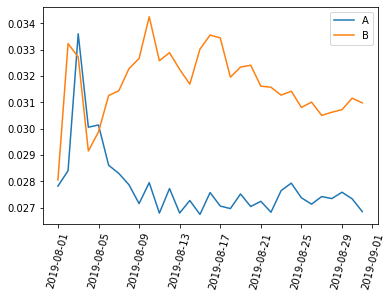

In [28]:
# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
# строим графики
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation = 75) 
plt.show()

Симметричный график получился. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд, а конверсия группы B просела. По графику нельзя сказать однозначно, что конверсии стабилизировались.

## График относительного изменения кумулятивной конверсии группы B к группе A. 

Объединим датафреймы сгруппированных данных.

In [29]:
cummulativeConversion = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']],
                                                                      on = 'date',suffixes=['A','B'],how='left')
cummulativeConversion.head()

,date,conversionA,conversionB
0,2019-08-01,0.027816,0.028050
1,2019-08-02,0.028401,0.033230
2,2019-08-03,0.033604,0.032723
3,2019-08-04,0.030055,0.029149
4,2019-08-05,0.030139,0.029878


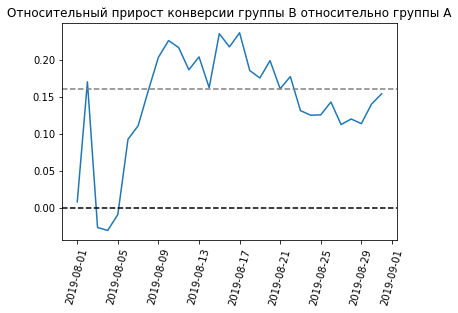

In [30]:
plt.plot(cummulativeConversion['date'],cummulativeConversion['conversionB']/cummulativeConversion['conversionA']-1)
plt.xticks(rotation=75)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.show()

Вначале теста заметны резкие cкачки, затем группа В вырвалась вперёд. Но ее конверсия то падает, то растет. В целом относительный прирост конверсии группы B относительно группы A положительный.

## Точечный график количества заказов по пользователям. 

Создадим таблицу с необходимыми данными.

In [31]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
                 .groupby('visitorId', as_index=False)
                 .agg({'transactionId' : pd.Series.nunique})
                 .sort_values(by='transactionId',ascending=False))
ordersByUsers.head()

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Построим точечную диаграмму числа заказов на одного пользователя.

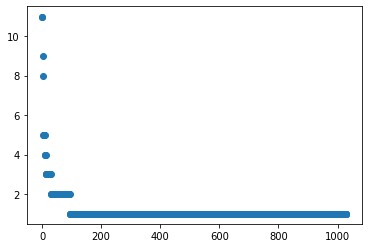

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers['visitorId'])))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.show()

Большинство покупателей заказывают только один раз. Но есть пользователи и сбольшим количеством заказов.

## Граница для определения аномальных пользователей (95-й и 99-й перцентили количества заказов на пользователя).

In [33]:
np.percentile(ordersByUsers,[95,99])

array([3.87010466e+09, 4.18972491e+09])

Не более 5% пользователей оформляли больше чем 2 заказов. 

## Точечный график стоимостей заказов.

Оценим стоимость заказов.

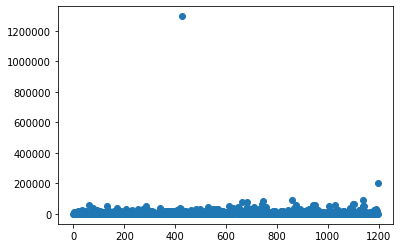

In [34]:
x_values_r = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values_r, orders['revenue'])
plt.show()

В основном выручка с заказа лежит в одном диапазоне, но по графику видно есть и аномальные заказы. Для того чтобы отсеять границу аномальных, найдем перцентили стоимости заказов, так как принято отсеивать от 1% до 5% наблюдений с крайними значениями.

## Граница для определения аномальных пользователей (95-й и 99-й перцентили стоимости заказов).

In [35]:
np.percentile(orders['revenue'],[95,99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 и не более 1% дороже 58233.2.

## Статистическая значимость различий в конверсии между группами по «сырым» данным. 

Подготовим выборки к проверке критерием Манна-Уитни. Создадим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

Прежде создадим переменные ordersByUsersA и ordersByUsersB с данными о пользователех, которые заказывали хотя бы 1 раз, и укажем число совершённых заказов.

In [36]:
ordersByUsersA = (orders[orders['group']=='A'].groupby('visitorId',as_index=False)
                  .agg({'transactionId':pd.Series.nunique})
                  .rename(columns={'transactionId':'transaction_count'}))
ordersByUsersB = (orders[orders['group']=='B'].groupby('visitorId',as_index=False)
                  .agg({'transactionId':pd.Series.nunique})
                  .rename(columns={'transactionId':'transaction_count'}))
print(ordersByUsersA.head())
print(ordersByUsersB.head())

   visitorId  transaction_count
0    8300375                  1
1   11685486                  1
2   54447517                  1
3   66685450                  1
4   78758296                  1
   visitorId  transaction_count
0    5114589                  1
1    6958315                  1
2    8300375                  1
3   39475350                  1
4   47206413                  1


Переменная sampleA должна состоять из двух частей: Список с количеством заказов для каждого из пользователей: ordersByUsersA['transaction_count']; Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах.

In [37]:
sampleA = pd.concat([ordersByUsersA['transaction_count'],
                    pd.Series(0,index=np.arange(visitors['visitors'].sum() - len(ordersByUsersA['transaction_count'])))],
                    axis=0)
sampleA.sample(5)

11018    0
8978     0
32565    0
30703    0
25710    0
dtype: int64

Аналогично создадим переменную sampleB.

In [38]:
sampleB = pd.concat([ordersByUsersB['transaction_count'],
                    pd.Series(0,index=np.arange(visitors['visitors'].sum() - len(ordersByUsersB['transaction_count'])))],
                    axis=0)
sampleB.sample(5)

28534    0
4301     0
32391    0
11862    0
17119    0
dtype: int64

Применим для A/B-тестирования критерий st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»).

Сформулируем нулевую гипотезу: статистически значимых различий в конверсии между группами по «сырым» данным нет. 

In [39]:
alpha = 0.05 # критический уровень статистической значимости

results = stats.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', results[1])

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница в конверсии между группами по «сырым» данным статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.005654039566920473
Отвергаем нулевую гипотезу: разница в конверсии между группами по «сырым» данным статистически значима


p-value = 0.005 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами по «сырым» данным нет, отвергаем. Разница в конверсии между группами по «сырым» данным статистически значима.

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. В sampleA сохранена выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: sampleB.mean().

In [40]:
print('Относительный прирост конверсии группы B: {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

Относительный прирост конверсии группы B: 0.149


Относительный выигрыш группы B равен 14.9%.

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [41]:
avg_revA = orders[orders['group']=='A']['revenue']
avg_revB = orders[orders['group']=='B']['revenue']

In [42]:
alpha = 0.05 # критический уровень статистической значимости

results = stats.mannwhitneyu(avg_revA, avg_revB)

print('p-значение: ', results[1])

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница в в среднем чеке заказа между группами по «сырым» данным статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Найдём относительные различия в среднем чеке между группами.

In [43]:
print("{0:.3f}".format(avg_revB.mean()/avg_revA.mean()-1))

0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке заказа между группами по «сырым» данным есть различия, нет. Хотя средний чек группы B на 25.9% выше среднего чека группы A.

## Статистическая значимость различий в конверсии между группами по «очищенным» данным. 

Очистим данные от аномалий. Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами.

In [44]:
# сделаем срез по пользователям, сделавших более 2 заказов 
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transaction_count']>2]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['transaction_count']>2]['visitorId']],axis=0)
usersWithManyOrders

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
227    2038680547
237    2108163459
269    2378935119
278    2458001652
349    2988190573
456    3908431265
467    3967698036
499    4256040402
37      249864742
68      457167155
284    2038680547
326    2378935119
340    2458001652
360    2587333274
382    2742574263
424    3062433592
501    3717692402
514    3803269165
580    4256040402
Name: visitorId, dtype: int64

In [45]:
# сделаем срез по пользователям, сделавших заказ на сумму более 28000
usersWithExpensiveOrders = orders[orders['revenue']>28000]['visitorId']

In [46]:
# объединим аномальных пользователей и удаляем дубликаты
abnormalUsers = pd.concat([usersWithExpensiveOrders,usersWithManyOrders], axis=0).drop_duplicates()
abnormalUsers.shape

(74,)

Очистим данные от выбросов и подготовим выборки к проверке критерием Манна-Уитни. Создадим переменные sampleAFiltered и sampleBFiltered, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [47]:
# делаем срез по неаномальным пользователям с их количеством заказов. Добавляем нулевые строки для пользователей, 
# несовершивших заказы
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['transaction_count'],
                            pd.Series(0,np.arange(visitors['visitors'].sum() - len(ordersByUsersA['visitorId'])))]
                            ,axis=0)
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
37144    0
37145    0
37146    0
37147    0
37148    0
Length: 37606, dtype: int64

In [48]:
# делаем срез по неаномальным пользователям с их количеством заказов. Добавляем нулевые строки для пользователей, 
# несовершивших заказы
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['transaction_count'],
                            pd.Series(0,np.arange(visitors['visitors'].sum() - len(ordersByUsersB['visitorId'])))]
                            ,axis=0)
sampleBFiltered

0        1
1        1
2        1
3        1
4        1
        ..
37061    0
37062    0
37063    0
37064    0
37065    0
Length: 37605, dtype: int64

Применим для A/B-тестирования критерий st.mannwhitneyu() (от англ. «U-критерий Манна-Уитни»).

Сформулируем нулевую гипотезу: статистически значимых различий в конверсии между группами по «очищенным» данным нет. 

In [49]:
alpha = 0.05 # критический уровень статистической значимости

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', results[1])

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница в конверсии между группами по «очищенным» данным статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.004437039050061997
Отвергаем нулевую гипотезу: разница в конверсии между группами по «очищенным» данным статистически значима


p-value = 0.004 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами по «сырым» данным нет, отвергаем. Вывод такой же как и для "сырых" данных. Разница в конверсии между группами по «сырым» данным статистически значима

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. В sampleAFiltered сохранена выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleAFiltered методом mean(). Аналогично найдём конверсию группы B: sampleBFiltered.mean().

In [50]:
print('Относительный прирост конверсии группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Относительный прирост конверсии группы B: 0.184


Относительный выигрыш группы B равен 18.4%. Наблюдается выигрыш группы В, как и в "сырых" данных (было 14.9%).

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов, очищенные от выбросов.

In [51]:
avg_revAfiltered = orders[np.logical_and(orders['group']=='A',
                                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
avg_revBfiltered = orders[np.logical_and(orders['group']=='B',
                                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

In [52]:
alpha = 0.05 # критический уровень статистической значимости

results = stats.mannwhitneyu(avg_revAfiltered, avg_revBfiltered)

print('p-значение: ', results[1])

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница в в среднем чеке заказа между группами по «сырым» данным статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.3692408756572825
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Найдём относительные различия в среднем чеке между группами.

In [53]:
print("{0:.3f}".format(avg_revBfiltered.mean()/avg_revAfiltered.mean()-1))

-0.020


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке заказа между группами по «очищенным» данным есть различия, нет. Такие же выводы были сделаны и по "сырым" данным. А вот относительная разница между группами сократилась с 25,9% до -2%, т.е. аномалии влияли на результат теста.

## Оценка результатов А/В - тестирования.

По результатам проведенного исследования пришли к следующим выводам.

Разница в конверсии между группами по "сырым" и данным после фильтрации аномалий статистически значима.
Относительный выигрыш группы B равен 18.4% (по "сырым" данным 14.9%).

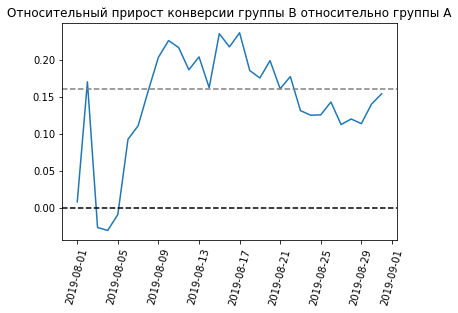

In [54]:
plt.plot(cummulativeConversion['date'],cummulativeConversion['conversionB']/cummulativeConversion['conversionA']-1)
plt.xticks(rotation=75)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.show()

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: прирост конверсии зафиксировался около положительного значения 0,16.

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. После удаления аномалий относительное различие среднего чека между группами всего 2%.

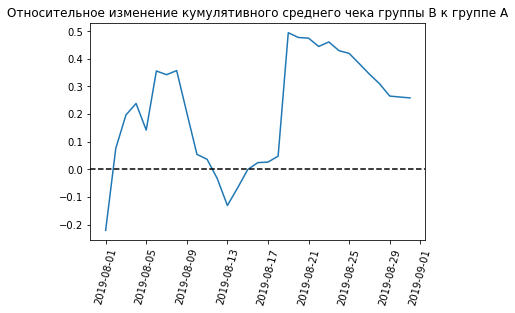

In [55]:
plt.plot(cummulativeAB['date'],(cummulativeAB['revenueB']/cummulativeAB['transactionIdB'])
                                /(cummulativeAB['revenueA']/cummulativeAB['transactionIdA'])-1)
plt.xticks(rotation = 75) 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График различия среднего чека колеблется и сделать из этого графика определённые выводы нельзя.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Конверсия группы В значимо больше конверсии группы А. Средний чек в группах А и В различается незначительно. В результате теста группа B оказалась лучше группы A.